# 패스트캠퍼스 바이트디그리 최종 프로젝트 과제 소개

## Load Dataset

In [4]:
from google.colab import drive

import pandas as pd

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/과제7")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/과제7'

In [6]:
order = pd.read_csv('order.csv')
course = pd.read_csv('course.csv')
customer = pd.read_csv('customer.csv')
refund = pd.read_csv('refund.csv')

**DB에 데이터를 넣고 작업을 하기 전에 로우 데이터들의 전처리가 필요해보여 파이썬으로 전처리 작업을 진행하겠습니다.**

In [8]:
# course 데이터 전처리
course['created_at'] = pd.to_datetime(course['created_at'], errors='coerce')
course['updated_at'] = pd.to_datetime(course['updated_at'], errors='coerce')
course['close_at'] = pd.to_datetime(course['close_at'], errors='coerce')

course['description'].fillna('데이터 없음', inplace=True)
course['keywords'].fillna('데이터 없음', inplace=True)
course['total_class_hours'].fillna(course['total_class_hours'].mean(), inplace=True)

course.head()

,id,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,211503.0,ONGOING,2021-08-19 09:09:00,2022-06-15 04:28:00,뇌 성장과 정서사회,소아정신과 전문의,NaT,8.00,데이터 없음
1,209970.0,ENDED,2022-01-25 05:39:00,2023-01-25 00:01:00,(B2B) 와이즈셀,데이터 없음,2023-01-24 15:00:00,33.92,데이터 없음
2,209948.0,ENDED,2022-01-25 04:18:00,2023-01-26 00:01:00,(B2B) 크몽 온,데이터 없음,2023-01-25 15:00:00,33.92,데이터 없음
3,209939.0,ONGOING,2022-01-24 06:24:00,2022-11-16 02:19:00,(B2B) K-Di,데이터 없음,NaT,19.00,데이터 없음
4,209938.0,ONGOING,2022-01-24 05:57:00,2022-11-16 02:39:00,K-Digital,데이터 없음,NaT,23.00,데이터 없음


In [22]:
# customer 데이터 전처리
customer['created_at'] = pd.to_datetime(customer['created_at'], errors='coerce')
customer['updated_at'] = pd.to_datetime(customer['updated_at'], errors='coerce')

customer.rename(columns={'user_id.1': 'username'}, inplace=True)

customer.drop(columns=['Unnamed: 6', 'Unnamed: 7'], inplace=True)

customer.head()

,id,user_id,state,created_at,updated_at,username
0,23139.0,12.0,NORMAL,2019-09-23 23:21:00,2023-05-01 06:20:00,iolo
1,23179.0,18.0,NORMAL,2019-09-24 02:05:00,2019-09-24 02:05:00,smki
2,18948.0,25.0,NORMAL,2019-09-09 08:27:00,2023-01-25 07:17:00,haed
3,17531.0,424.0,NORMAL,2019-09-07 10:10:00,2023-10-19 01:13:00,gkaw
4,23028.0,1103.0,NORMAL,2019-09-23 08:45:00,2022-11-21 20:39:00,kang


In [17]:
# order 데이터 전처리
order['created_at'] = pd.to_datetime(order['created_at'], errors='coerce')
order['updated_at'] = pd.to_datetime(order['updated_at'], errors='coerce')

order['sale_price'].fillna(order['list_price'], inplace=True)
order['discount_price'].fillna(0, inplace=True)

order.head()

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price
0,853323,791388,ORDER,COMPLETED,205080,나의 칼퇴치트키 엑,2022-01-31 23:52:00,2022-01-31 23:54:00,156000,136000.0,20000.0
1,853322,560400,ORDER,COMPLETED,205080,나의 칼퇴치트키 엑,2022-01-31 23:51:00,2022-01-31 23:51:00,156000,156000.0,0.0
2,853319,455290,ORDER,PENDING,204013,완전정복! 시각디자,2022-01-31 23:40:00,2022-01-31 23:40:00,250000,250000.0,0.0
3,853317,279538,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-31 23:39:00,2022-01-31 23:39:00,447000,447000.0,0.0
4,853314,790438,ORDER,COMPLETED,205761,한 번에 끝내는 디,2022-01-31 23:30:00,2022-01-31 23:31:00,261000,261000.0,0.0


In [21]:
# refund 데이터 전처리
refund['created_at'] = pd.to_datetime(refund['created_at'], errors='coerce')
refund['updated_at'] = pd.to_datetime(refund['updated_at'], errors='coerce')

refund.drop(columns=['Unnamed: 7'], inplace=True)

refund['amount'] = refund['amount'].abs()

refund.head()

,order_id,refund_id,refund_status,created_at,updated_at,course_id,amount
0,773436.0,45470.0,COMPLETED,2022-01-06 09:46:00,2022-01-06 09:46:00,206185.0,241000.0
1,773451.0,45382.0,COMPLETED,2022-01-06 05:24:00,2022-01-06 05:24:00,203146.0,210000.0
2,773507.0,44996.0,COMPLETED,2022-01-03 06:23:00,2022-01-03 06:23:00,205949.0,132205.0
3,773520.0,46333.0,COMPLETED,2022-01-17 04:41:00,2022-01-17 04:41:00,203782.0,120666.0
4,773529.0,45256.0,COMPLETED,2022-01-05 08:59:00,2022-01-05 08:59:00,206060.0,212000.0


In [24]:
# 전처리가 완료된 데이터들을 기존 경로에 csv로 저장
# 클린징 데이터라는 의미를 구분하기 위해 "_c" 추가
course_path = '/content/drive/MyDrive/Colab Notebooks/과제7/course_c.csv'
customer_path = '/content/drive/MyDrive/Colab Notebooks/과제7/customer_c.csv'
order_path = '/content/drive/MyDrive/Colab Notebooks/과제7/order_c.csv'
refund_path = '/content/drive/MyDrive/Colab Notebooks/과제7/refund_c.csv'

course.to_csv(course_path, index=False)
customer.to_csv(customer_path, index=False)
order.to_csv(order_path, index=False)
refund.to_csv(refund_path, index=False)

## Q1. Data Extract - SQL


- Q1-1. 4개의 테이블(order, customer, course, refund)을 하나의 테이블로 조인하는 쿼리를 작성해주세요.
- Q1-2. (Order) 2022년 1월 일자별 가장 빠르게 신청된 강의(created_at)와 가장 나중에 신청된 강의를 볼 수 있는 쿼리를 작성해 주세요. (First_Value, Last_value, partition by)
- Q1-3. Order 테이블의 list_price를 일자별(created_at)로 합계한 후, 1일 전 과 1일 후의 매출을 column으로 만들어 주세요. (lead, lag)

Q1-1. 4개의 테이블(order, customer, course, refund)을 하나의 테이블로 조인하는 쿼리를 작성해주세요.

<분석결과>

course_c 테이블:
컬럼: id, state, created_at, updated_at, title, description, close_at, total_class_hours, keywords
<br/> 주요 키: id (강의 ID)

customer_c 테이블:
컬럼: id, user_id, state, created_at, updated_at, username
<br/> 주요 키: id (고객 ID)

order_c 테이블:
컬럼: order_id, customer_id, type, status, course_id, name, created_at, updated_at, list_price, sale_price, discount_price
<br/> 주요 키: order_id (주문 ID), customer_id (고객 ID), course_id (강의 ID)

refund_c 테이블:
컬럼: order_id, refund_id, refund_status, created_at, updated_at, course_id, amount
<br/> 주요 키: order_id (주문 ID), course_id (강의 ID)

<Q1-1 답안>

**SELECT *
FROM customer_c AS cstm
<br/>LEFT JOIN order_c AS od ON cstm.id = od.customer_id
<br/>LEFT JOIN course_c AS cs ON od.course_id = cs.id
<br/>LEFT JOIN refund_c AS rf ON od.order_id = rf.order_id;**


<Q1-2 답안>

**SELECT DISTINCT
</br>    DATE(created_at) AS order_date,
</br>    FIRST_VALUE(course_id) OVER (PARTITION BY DATE(created_at) ORDER BY created_at ASC) AS first_course_id,
</br>    LAST_VALUE(course_id) OVER (PARTITION BY DATE(created_at) ORDER BY created_at ASC RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_course_id
</br>FROM order_c
</br>WHERE created_at BETWEEN '2022-01-01' AND '2022-01-31'
</br>ORDER BY order_date;**


<Q1-3 답안>
**</br>WITH DailySales AS (
</br>    SELECT
</br>        DATE(created_at) AS order_date,
</br>        SUM(list_price) AS total_sales
</br>    FROM order_c
</br>    GROUP BY DATE(created_at)
</br>)
</br>SELECT
</br>    order_date,
</br>    total_sales,
</br>    LAG(total_sales, 1) OVER (ORDER BY order_date) AS previous_day_sales,
</br>    LEAD(total_sales, 1) OVER (ORDER BY order_date) AS next_day_sales
</br>FROM DailySales
</br>ORDER BY order_date;**


## Q2. Data Analysis - Python 2022년 1월 기준

- Q2-1 (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요?
(status = COMPLETED 기준)
- Q2-2 (Order) 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?
- Q2-3 (Order) 각 강의 별 할인율은 어떻게 될까요?
- Q2-4 (Customer) 회원들은 주로 몇시에 회원 가입을 했나요?
- Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?
- Q2-6 (Customer) 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?
- Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?
- Q2-8 (Course) Keyword 열에서 가장 많이 반복되는 단어는 어떤 단어인가요?
- Q2-9 (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.
- Q2-10 (Order) 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중은 각각 어떻게 될까요?

In [3]:
#전처리된 데이터를 다시 호출
import numpy as np
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/과제7")
os.getcwd()

order_c = pd.read_csv('order_c.csv')
course_c = pd.read_csv('course_c.csv')
customer_c = pd.read_csv('customer_c.csv')
refund_c = pd.read_csv('refund_c.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Q2-1 (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요? (status = COMPLETED 기준)
# 'COMPLETED' 상태이며 2022년 1월인 주문을 필터링
order_c['created_at'] = pd.to_datetime(order_c['created_at'])
completed_orders_jan2022 = order_c[(order_c['status'] == 'COMPLETED') &
                                      (order_c['created_at'].dt.year == 2022) &
                                      (order_c['created_at'].dt.month == 1)]

# 날짜별로 그룹화하고 각 날짜의 총 매출을 계산
daily_sales = completed_orders_jan2022.groupby(completed_orders_jan2022['created_at'].dt.date).sum()['list_price']

# 매출이 가장 높았던 상위 3일과 가장 낮았던 하위 3일
top_3_days = daily_sales.nlargest(3)
bottom_3_days = daily_sales.nsmallest(3)

top_3_days, bottom_3_days

(created_at
 2022-01-03    284255000
 2022-01-09    261886930
 2022-01-05    245899040
 Name: list_price, dtype: int64,
 created_at
 2022-01-22    37842240
 2022-01-01    49548000
 2022-01-23    54444580
 Name: list_price, dtype: int64)

In [34]:
# Q2-2 (Order) 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?
# 상위 3일과 하위 3일의 날짜를 추출
selected_dates = top_3_days.index.union(bottom_3_days.index)

# 선택된 날짜에 대한 주문을 필터링
selected_orders = completed_orders_jan2022[completed_orders_jan2022['created_at'].dt.date.isin(selected_dates)]

# 각 날짜에 대한 매출액, 주문 수, 신청자 수, 강의 수를 계산
aggregated_data = selected_orders.groupby(selected_orders['created_at'].dt.date).agg({
    'list_price': 'sum',              # 매출액
    'order_id': 'count',              # 주문 수
    'customer_id': 'nunique',         # 고유 신청자 수
    'course_id': 'nunique'            # 고유 강의 수
})

aggregated_data



,list_price,order_id,customer_id,course_id
created_at,,,,
2022-01-01,49548000,234,220,107
2022-01-03,284255000,1281,1186,213
2022-01-05,245899040,1114,1014,208
2022-01-09,261886930,1190,1055,204
2022-01-22,37842240,170,143,105
2022-01-23,54444580,256,229,107


In [36]:
# Q2-3 (Order) 각 강의 별 할인율은 어떻게 될까요?
# 강의 별 할인율 계산
# 할인율 = (list_price - sale_price) / list_price

# 0으로 나누는 경우를 방지하기 위해 list_price가 0이 아닌 경우만 고려
order_c_non_zero = order_c[order_c['list_price'] != 0]

# 각 강의 별 할인율 계산
order_c_non_zero['discount_rate'] = (order_c_non_zero['list_price'] - order_c_non_zero['sale_price']) / order_c_non_zero['list_price']

# 강의 별로 그룹화하여 평균 할인율 계산
discount_rates = order_c_non_zero.groupby('course_id')['discount_rate'].mean()

discount_rates

course_id
200260    0.020189
200399    0.035842
201435    0.142895
201547    0.078331
201786    0.120757
            ...   
209884    0.000000
209939    0.000000
209948    0.000000
209970    0.000000
211503    0.049996
Name: discount_rate, Length: 286, dtype: float64

In [37]:
# Q2-4 (Customer) 회원들은 주로 몇시에 회원 가입을 했나요?

# created_at 컬럼을 datetime 타입으로 변환
customer_c['created_at'] = pd.to_datetime(customer_c['created_at'])

# 회원 가입 시간(시간만)을 추출
customer_c['signup_hour'] = customer_c['created_at'].dt.hour

# 시간별 회원 가입 수를 계산
signup_hours = customer_c['signup_hour'].value_counts().sort_index()

signup_hours

0.0      785
1.0     1077
2.0     1086
3.0      881
4.0     1086
5.0     1161
6.0     1195
7.0     1197
8.0     1128
9.0     1005
10.0     984
11.0    1061
12.0    1253
13.0    1311
14.0    1302
15.0     817
16.0     503
17.0     335
18.0     247
19.0     152
20.0     151
21.0     183
22.0     280
23.0     504
Name: signup_hour, dtype: int64

In [38]:
# Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?
# 강의(course_id) 별 환불 횟수 계산
refund_counts = refund_c['course_id'].value_counts()

# 가장 환불 횟수가 많은 강의 확인
most_refunded_course = refund_counts.idxmax()
most_refunded_count = refund_counts.max()

most_refunded_course, most_refunded_count

(203720.0, 31)

In [39]:
# Q2-6 (Customer) 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?
# 고객(customer_id) 별 총 구매 금액 계산
customer_total_purchase = order_c.groupby('customer_id')['list_price'].sum()

# 가장 많이 구매한 고객과 그 금액 확인
top_customer = customer_total_purchase.idxmax()
top_customer_amount = customer_total_purchase.max()

top_customer, top_customer_amount



(116416, 271527136)

In [40]:
# Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?
# created_at 컬럼을 다시 datetime 타입으로 변환
order_c['created_at'] = pd.to_datetime(order_c['created_at'])

# 주말과 주중을 구분하기 위해 요일 정보를 추가
order_c['day_of_week'] = order_c['created_at'].dt.dayofweek

# 주말(토, 일 = 5, 6)과 주중(월-금 = 0-4) 구분
order_c['is_weekend'] = order_c['day_of_week'].isin([5, 6])

# 주말과 주중의 강의 신청 횟수 계산
weekend_orders = order_c[order_c['is_weekend']]['order_id'].count()
weekday_orders = order_c[~order_c['is_weekend']]['order_id'].count()

# 주말과 주중의 일수 계산
total_weekends = len(order_c[order_c['is_weekend']]['created_at'].dt.date.unique())
total_weekdays = len(order_c[~order_c['is_weekend']]['created_at'].dt.date.unique())

# 주말과 주중의 평균 강의 신청율 계산
avg_weekend_order_rate = weekend_orders / total_weekends
avg_weekday_order_rate = weekday_orders / total_weekdays

avg_weekend_order_rate, avg_weekday_order_rate

(818.3, 938.6190476190476)

In [42]:
# Q2-8 (Course) Keyword 열에서 가장 많이 반복되는 단어는 어떤 단어인가요?

# keywords 열에서 각 키워드를 분리
keywords_list = course_c['keywords'].str.lower().str.split().tolist()

# 모든 키워드를 하나의 리스트로 합침
all_keywords = [keyword for sublist in keywords_list for keyword in sublist if isinstance(sublist, list)]

# 가장 많이 반복된 단어와 그 빈도수를 계산
keyword_counts = Counter(all_keywords)
most_common_word, most_common_count = keyword_counts.most_common(1)[0]

most_common_word, most_common_count

('데이터', 27588)

In [9]:
# Q2-9 (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.

bins = np.arange(0, order_c['list_price'].max() + 50000, 50000)
price_distribution = pd.cut(order_c['list_price'], bins=bins).value_counts().sort_index()

price_distribution

(0, 50000]                73
(50000, 100000]          451
(100000, 150000]        2164
(150000, 200000]        9504
(200000, 250000]        9788
                        ... 
(66600000, 66650000]       0
(66650000, 66700000]       0
(66700000, 66750000]       0
(66750000, 66800000]       0
(66800000, 66850000]       4
Name: list_price, Length: 1337, dtype: int64

In [11]:
# Q2-10 (Order) 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중은 각각 어떻게 될까요?
# 강의 상태별로 그룹화하여 금액(list_price)과 고객 수(user_id)의 총계 및 비율을 계산
status_grouped = order_c.groupby('status').agg({'list_price': 'sum', 'customer_id': 'nunique'})

# 전체 금액과 고객 수 계산
total_price = status_grouped['list_price'].sum()
total_customers = status_grouped['customer_id'].sum()

# 금액과 고객 수의 비율 계산
status_grouped['price_proportion'] = status_grouped['list_price'] / total_price
status_grouped['customer_proportion'] = status_grouped['customer_id'] / total_customers

status_grouped

,list_price,customer_id,price_proportion,customer_proportion
status,,,,
CANCELLED,1655615498,4164,0.254523,0.206261
COMPLETED,3643955954,13262,0.560197,0.656925
PENDING,1205201204,2762,0.185280,0.136814


## Q3. Data Visualization - Excel, Tableau, Power BI, python(matplolib, seaborn)
Q2에 대한 답을 하면서 적절하다고 생각하는 차트를 만들어주세요

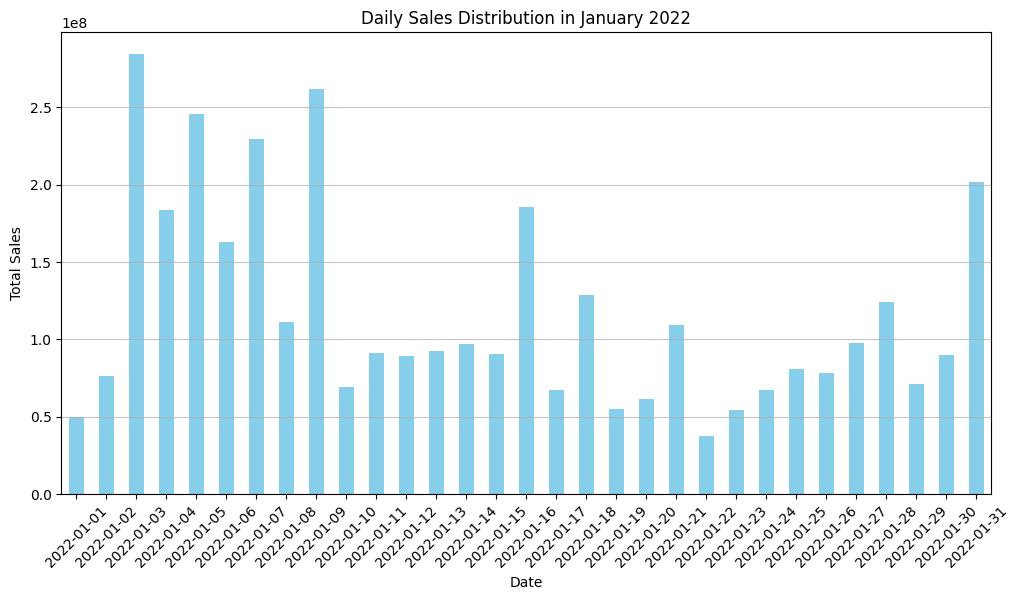

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Q2-1 관련 2022년 1월의 매출 분포 시각화
# 'COMPLETED' 상태이며 2022년 1월인 주문을 필터링
order_c['created_at'] = pd.to_datetime(order_c['created_at'])
completed_orders_jan2022 = order_c[(order_c['status'] == 'COMPLETED') &
                                      (order_c['created_at'].dt.year == 2022) &
                                      (order_c['created_at'].dt.month == 1)]

# 날짜별로 그룹화하고 각 날짜의 총 매출을 계산
daily_sales = completed_orders_jan2022.groupby(completed_orders_jan2022['created_at'].dt.date).sum()['list_price']

# 매출 분포 시각화
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', color='skyblue')

plt.title('Daily Sales Distribution in January 2022')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

plt.show()

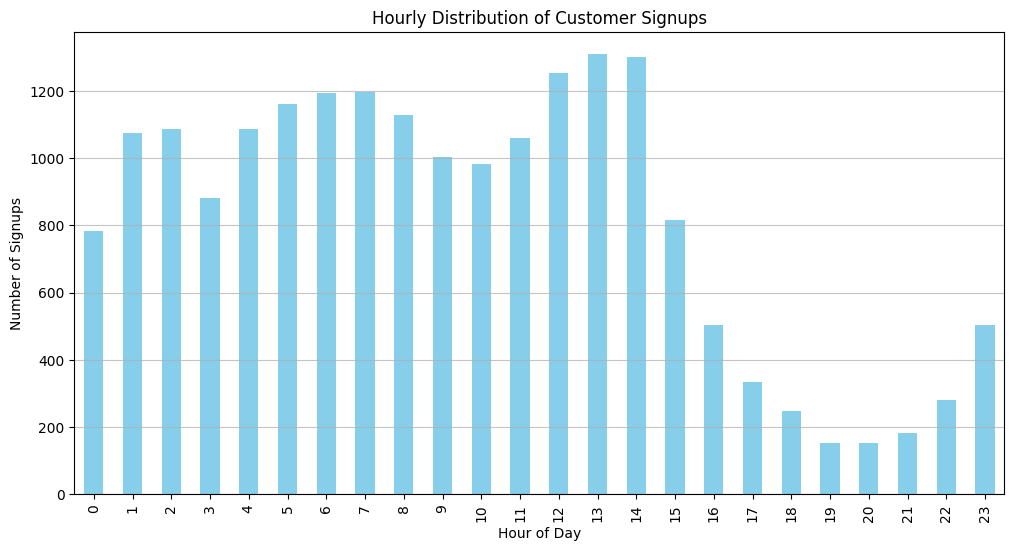

In [16]:
# Q2-4 관련 회원들이 몇시에 회원 가입을 했는지에 대한 시각화 진행
# created_at 컬럼을 datetime 타입으로 변환
customer_c['created_at'] = pd.to_datetime(customer_c['created_at'])

# 회원 가입 시간(시간만)을 추출
customer_c['signup_hour'] = customer_c['created_at'].dt.hour

# 시간별 회원 가입 수를 계산
signup_hours = customer_c['signup_hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 6))
signup_hours.plot(kind='bar', color='skyblue')

plt.title('Hourly Distribution of Customer Signups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Signups')
plt.xticks(range(0, 24), range(0, 24))
plt.grid(axis='y', alpha=0.75)

plt.show()

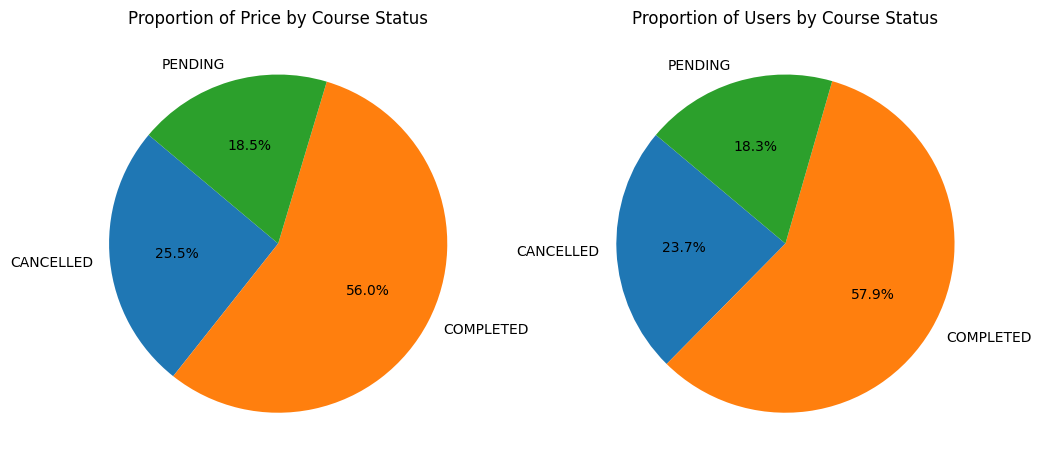

In [7]:
# Q2-10에 대한 시각화를 진행
# 강의 상태(Completed, Pending, Cancelled)별로 금액(list_price)과 유저(customer_id)의 비중 계산
status_summary = order_c.groupby('status')['list_price'].agg(['sum', 'count'])

# 시각화를 위한 준비
labels = status_summary.index
sizes_price = status_summary['sum']
sizes_users = status_summary['count']

# 금액에 대한 파이 차트
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes_price, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Price by Course Status')

# 유저에 대한 파이 차트
plt.subplot(1, 2, 2)
plt.pie(sizes_users, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Users by Course Status')

# 금액에 따른, 유저에 따른 기준으로 한 두 파이 차트가 비슷한 양상을 보임
plt.show()

## Q4. Analytics Report
데이터를 보면서 데이터 분석가로서 찾아낸 인사이트를 공유해주세요. 데이터 분석가마다 보는 관점이 다르고 나타내는 방법도 다양합니다. 데이터 분석을 잘 모르는 비즈니스 유저에게 본인의 분석 결과를 설명한다고 가정하고 어떤 제안을 할 수 있는지 생각해 보면 좋을 것 같습니다.

**가장 매출이 높은 강의와 낮은 강의 비교:**
</br>인사이트: 2022년 1월의 데이터에서, 가장 높은 매출을 기록한 날과 가장 낮은 매출을 기록한 날 사이에는 상당한 차이가 있었습니다.
</br>제안: 고매출 날짜의 특징을 분석하여 마케팅 전략에 반영할 수 있습니다. 예를 들어, 특정 이벤트나 프로모션이 있었던 날이라면 그 요소를 다른 날에도 적용해 볼 수 있습니다.

**</br>회원 가입 시간 분포:**
</br>인사이트: 사용자들의 회원 가입 시간 분포를 보면, 특정 시간대에 가입이 집중되는 경향이 있습니다.
</br>제안: 가입이 많은 시간대에 맞춰 마케팅 리소스를 집중하는 것도 좋은 전략이 될 것으로 보입니다.

**</br>환불이 많았던 강의:**
</br>인사이트: 환불이 많았던 강의를 분석해볼 때, 해당 강의의 품질이나 콘텐츠에 문제가 있을 수 있습니다.
</br>제안: 환불이 많은 강의의 원인을 파악하여 개선하거나, 다른 인기 강의와의 비교 분석을 통해 개선점을 찾아볼 수 있습니다.

**</br>강의 가격대별 분포:**
</br>인사이트: 강의 가격대별 분포를 통해 어떤 가격대의 강의가 가장 많은지, 또는 가장 적은지 파악할 수 있습니다.
</br>제안: 강의 가격 책정시 가장 많이 팔리는 가격대를 고려해볼 수 있습니다. 판매가 저조한 가격대의 강의에 대한 마케팅 전략을 재고해 볼 수 있습니다.